<a href="https://colab.research.google.com/github/gustavoravel/data_science_portfolio/blob/main/Analyzing_Violence_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Rio de Janeiro's Violence

In this notebook, we are going to give another introduction to the EDA (Exploratory Data Analysis) with a time series analysis using the information given by the Rio de Janeiro State Office about the violence, crime and justice. All the data was preparated to focus on basic Data Science techniques to analyze numerical and cathegorical variables, and what conclusions we can make whit it.

Here in Brazil, Rio has been affectionately called narco-state. ONGs and universities studies says that organized crime dominates 72% of the territory. 

Let's find out what the data wants to tell us about it.

## Data Collection

Our dataset is comming from the database of the Military Police of Rio de Janeiro, covering the 1991 to 2019 season. All the information can be retrieved from http://www.ispdados.rj.gov.br/estatistica.html



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')


In [2]:
rj = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')
rj.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


## Initial Data Analysis

We can see from the first lines that the data are summarized by months of the year. And each column (or variable) is quantitative information for that month (occurrence count). The NaN values can correspond (we are not sure) the absence of that occurrence, so they were left without information, to save space.

The following information tells us what steps we should take to clean the data set.


In [3]:
#general dataset information
rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

In [4]:
#missing value information
rj.isnull().sum() / len(rj)

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

## Dataset Cleaning

In order to not lose the essence of the dataset, we will count as `0` occurrences in the line of each variable that has its null observation.

In [5]:
#replace NaN values by 0
rj = rj.fillna(0)
rj.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,0.0,15,0.0,162,3051,0.0,0.0,0.0,350,188,1174,63,967,381,37,0.0,0.0,0.0,0.0,0.0,158,3318,2009,1147,0.0,0.0,0.0,3561,6717,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,872,0.0,0.0,0.0,0.0,0.0,0.0,217,0.0,0.0,0.0,672,1348,1174,0.0,3
1,1991,2,732,0.0,17,0.0,175,3421,0.0,0.0,0.0,357,171,1097,64,963,432,35,0.0,0.0,0.0,0.0,0.0,142,3261,1850,1066,0.0,0.0,0.0,3309,6225,0.0,0.0,0.0,0.0,127,0.0,0.0,0.0,751,0.0,0.0,0.0,0.0,0.0,0.0,209,0.0,0.0,0.0,749,1395,1097,0.0,3
2,1991,3,713,0.0,25,0.0,216,3613,0.0,0.0,0.0,443,191,1265,71,963,422,43,0.0,0.0,0.0,0.0,0.0,131,3529,2084,1062,0.0,0.0,0.0,3573,6719,0.0,0.0,0.0,0.0,80,0.0,0.0,0.0,789,0.0,0.0,0.0,0.0,0.0,0.0,188,0.0,0.0,0.0,738,1385,1265,0.0,3
3,1991,4,634,0.0,20,0.0,200,3211,0.0,0.0,0.0,425,199,1415,81,1186,354,36,0.0,0.0,0.0,0.0,0.0,112,3808,2085,1195,0.0,0.0,0.0,3290,6570,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,787,0.0,0.0,0.0,0.0,0.0,0.0,140,0.0,0.0,0.0,654,1540,1415,0.0,3
4,1991,5,650,0.0,20,0.0,146,3051,0.0,0.0,0.0,553,231,1449,82,931,335,27,0.0,0.0,0.0,0.0,0.0,147,3755,2185,723,0.0,0.0,0.0,3546,6454,0.0,0.0,0.0,0.0,163,0.0,0.0,0.0,845,0.0,0.0,0.0,0.0,0.0,0.0,78,0.0,0.0,0.0,670,1266,1449,0.0,3


A quick spell check on a column to avoid misinterpretation.

In [6]:
#replace 'vano' by 'ano'
rj = rj.rename(columns={'vano': 'ano'})
rj.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,0.0,15,0.0,162,3051,0.0,0.0,0.0,350,188,1174,63,967,381,37,0.0,0.0,0.0,0.0,0.0,158,3318,2009,1147,0.0,0.0,0.0,3561,6717,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,872,0.0,0.0,0.0,0.0,0.0,0.0,217,0.0,0.0,0.0,672,1348,1174,0.0,3
1,1991,2,732,0.0,17,0.0,175,3421,0.0,0.0,0.0,357,171,1097,64,963,432,35,0.0,0.0,0.0,0.0,0.0,142,3261,1850,1066,0.0,0.0,0.0,3309,6225,0.0,0.0,0.0,0.0,127,0.0,0.0,0.0,751,0.0,0.0,0.0,0.0,0.0,0.0,209,0.0,0.0,0.0,749,1395,1097,0.0,3
2,1991,3,713,0.0,25,0.0,216,3613,0.0,0.0,0.0,443,191,1265,71,963,422,43,0.0,0.0,0.0,0.0,0.0,131,3529,2084,1062,0.0,0.0,0.0,3573,6719,0.0,0.0,0.0,0.0,80,0.0,0.0,0.0,789,0.0,0.0,0.0,0.0,0.0,0.0,188,0.0,0.0,0.0,738,1385,1265,0.0,3
3,1991,4,634,0.0,20,0.0,200,3211,0.0,0.0,0.0,425,199,1415,81,1186,354,36,0.0,0.0,0.0,0.0,0.0,112,3808,2085,1195,0.0,0.0,0.0,3290,6570,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,787,0.0,0.0,0.0,0.0,0.0,0.0,140,0.0,0.0,0.0,654,1540,1415,0.0,3
4,1991,5,650,0.0,20,0.0,146,3051,0.0,0.0,0.0,553,231,1449,82,931,335,27,0.0,0.0,0.0,0.0,0.0,147,3755,2185,723,0.0,0.0,0.0,3546,6454,0.0,0.0,0.0,0.0,163,0.0,0.0,0.0,845,0.0,0.0,0.0,0.0,0.0,0.0,78,0.0,0.0,0.0,670,1266,1449,0.0,3


As our dataset has a temporal notation (lines with information summarized by months of the year), we will concatenate the time variables and drop those that we will no longer use, in order to facilitate the work of bringing accurate information.

In [7]:
#concat 'ano', 'mes' to a single column and drop them
rj['data'] = rj['ano'].astype(str) + '-' + rj['mes'].astype(str)
rj['data']

0      1991-1
1      1991-2
2      1991-3
3      1991-4
4      1991-5
        ...  
339    2019-4
340    2019-5
341    2019-6
342    2019-7
343    2019-8
Name: data, Length: 344, dtype: object

In [8]:
rj.drop(['ano', 'mes'], axis='columns', inplace=True)
rj.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,data
0,657,0.0,15,0.0,162,3051,0.0,0.0,0.0,350,188,1174,63,967,381,37,0.0,0.0,0.0,0.0,0.0,158,3318,2009,1147,0.0,0.0,0.0,3561,6717,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,872,0.0,0.0,0.0,0.0,0.0,0.0,217,0.0,0.0,0.0,672,1348,1174,0.0,3,1991-1
1,732,0.0,17,0.0,175,3421,0.0,0.0,0.0,357,171,1097,64,963,432,35,0.0,0.0,0.0,0.0,0.0,142,3261,1850,1066,0.0,0.0,0.0,3309,6225,0.0,0.0,0.0,0.0,127,0.0,0.0,0.0,751,0.0,0.0,0.0,0.0,0.0,0.0,209,0.0,0.0,0.0,749,1395,1097,0.0,3,1991-2
2,713,0.0,25,0.0,216,3613,0.0,0.0,0.0,443,191,1265,71,963,422,43,0.0,0.0,0.0,0.0,0.0,131,3529,2084,1062,0.0,0.0,0.0,3573,6719,0.0,0.0,0.0,0.0,80,0.0,0.0,0.0,789,0.0,0.0,0.0,0.0,0.0,0.0,188,0.0,0.0,0.0,738,1385,1265,0.0,3,1991-3
3,634,0.0,20,0.0,200,3211,0.0,0.0,0.0,425,199,1415,81,1186,354,36,0.0,0.0,0.0,0.0,0.0,112,3808,2085,1195,0.0,0.0,0.0,3290,6570,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,787,0.0,0.0,0.0,0.0,0.0,0.0,140,0.0,0.0,0.0,654,1540,1415,0.0,3,1991-4
4,650,0.0,20,0.0,146,3051,0.0,0.0,0.0,553,231,1449,82,931,335,27,0.0,0.0,0.0,0.0,0.0,147,3755,2185,723,0.0,0.0,0.0,3546,6454,0.0,0.0,0.0,0.0,163,0.0,0.0,0.0,845,0.0,0.0,0.0,0.0,0.0,0.0,78,0.0,0.0,0.0,670,1266,1449,0.0,3,1991-5


Set the correct data type for the concat we made.

In [9]:
#set datatype
rj['data'] = pd.to_datetime(rj['data'])
rj['data'].dtypes

dtype('<M8[ns]')

And set it as our index, to facilitate the time series analysis.

In [10]:
#set index
rj.set_index('data', inplace=True)
rj.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,657,0.0,15,0.0,162,3051,0.0,0.0,0.0,350,188,1174,63,967,381,37,0.0,0.0,0.0,0.0,0.0,158,3318,2009,1147,0.0,0.0,0.0,3561,6717,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,872,0.0,0.0,0.0,0.0,0.0,0.0,217,0.0,0.0,0.0,672,1348,1174,0.0,3
1991-02-01,732,0.0,17,0.0,175,3421,0.0,0.0,0.0,357,171,1097,64,963,432,35,0.0,0.0,0.0,0.0,0.0,142,3261,1850,1066,0.0,0.0,0.0,3309,6225,0.0,0.0,0.0,0.0,127,0.0,0.0,0.0,751,0.0,0.0,0.0,0.0,0.0,0.0,209,0.0,0.0,0.0,749,1395,1097,0.0,3
1991-03-01,713,0.0,25,0.0,216,3613,0.0,0.0,0.0,443,191,1265,71,963,422,43,0.0,0.0,0.0,0.0,0.0,131,3529,2084,1062,0.0,0.0,0.0,3573,6719,0.0,0.0,0.0,0.0,80,0.0,0.0,0.0,789,0.0,0.0,0.0,0.0,0.0,0.0,188,0.0,0.0,0.0,738,1385,1265,0.0,3
1991-04-01,634,0.0,20,0.0,200,3211,0.0,0.0,0.0,425,199,1415,81,1186,354,36,0.0,0.0,0.0,0.0,0.0,112,3808,2085,1195,0.0,0.0,0.0,3290,6570,0.0,0.0,0.0,0.0,133,0.0,0.0,0.0,787,0.0,0.0,0.0,0.0,0.0,0.0,140,0.0,0.0,0.0,654,1540,1415,0.0,3
1991-05-01,650,0.0,20,0.0,146,3051,0.0,0.0,0.0,553,231,1449,82,931,335,27,0.0,0.0,0.0,0.0,0.0,147,3755,2185,723,0.0,0.0,0.0,3546,6454,0.0,0.0,0.0,0.0,163,0.0,0.0,0.0,845,0.0,0.0,0.0,0.0,0.0,0.0,78,0.0,0.0,0.0,670,1266,1449,0.0,3


## Statistical Information on Violence in Rio de Janeiro

Now that we have cleaned up our dataset and prepared it for analysis, we will collect some statistical information. Since our dataset is lacking in categorical data, we will not categorize them, we will only work with numbers over time.

In the cell below we can see a brief summary statistics about our data.

In [11]:
#describe the dataset
rj.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,504.555233,3.125000,15.668605,54.343023,318.267442,5492.799419,215.084302,160.322674,2458.921512,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,2.063953,657.215116,6.581395,84.688953,2.136628,1211.223837,9428.119186,1674.671512,1518.921512,378.040698,842.543605,24.671512,5994.328488,10433.177326,0.479651,77.479651,4.508721,1297.593023,1071.930233,290.450581,361.918605,88.744186,1772.238372,1105.848837,271.090116,598.558140,39.590116,3986.979651,268.162791,66.261628,2.034884,1.212209,0.197674,577.691860,4734.738372,2448.697674,38781.837209,2.994186
std,113.774481,3.042759,5.861427,44.297284,127.606645,1514.220579,196.404003,102.710428,1667.674083,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.665290,682.112813,7.421056,83.421892,5.510811,800.576723,4578.013053,294.852020,971.853102,380.958762,769.055354,61.119819,1964.767779,3696.725756,0.867047,73.639573,5.450539,1249.676379,643.381991,348.844094,436.694080,96.397886,656.761843,1243.874620,331.861681,674.499665,60.071124,2654.009500,218.020386,34.464519,2.354563,1.691609,0.513827,104.973929,3204.054864,789.689559,25916.342210,0.076138
min,272.000000,0.000000,2.000000,0.000000,122.000000,2350.000000,0.000000,0.000000,0.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,0.000000,0.000000,0.000000,2322.000000,4691.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,729.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1086.000000,1097.000000,0.000000,2.000000
25%,413.750000,0.000000,11.000000,14.500000,200.000000,4067.000000,0.000000,127.250000,0.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,811.750000,5107.750000,1430.500000,732.000000,0.000000,0.000000,0.000000,3978.000000,6700.250000,0.000000,0.000000,0.000000,0.000000,714.500000,0.000000,0.000000,0.000000,1276.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,500.000000,1557.000000,1889.750000,0.000000,3.000000
50%,507.000000,3.000000,15.000000,50.000000,318.500000,5830.500000,257.000000,185.000000,3109.500000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,1.000000,561.500000,5.000000,77.500000,0.000000,1154.000000,9243.500000,1637.500000,1076.500000,341.500000,1099.000000,0.000000,6559.000000,10448.500000,0.00

We know that car theft brings huge losses, both for the State and for the victim.

Over the years, theft and theft of vehicles has grown in Rio de Janeiro, and the recovery of these vehicles is somewhat inefficient, as we see in the averages summarized annually below:

In [12]:
#yearly avgs // ma = media anual
roubo_veic_ma = rj['roubo_veiculo'].resample('Y').mean()
roubo_veic_ma.head()

data
1991-12-31    1371.000000
1992-12-31    2041.833333
1993-12-31    2065.833333
1994-12-31    2289.166667
1995-12-31    1973.000000
Freq: A-DEC, Name: roubo_veiculo, dtype: float64

In [13]:
furto_veic_ma = rj['furto_veiculos'].resample('Y').mean()
furto_veic_ma.head()

data
1991-12-31    1998.250000
1992-12-31    2301.583333
1993-12-31    2241.416667
1994-12-31    2185.916667
1995-12-31    1827.333333
Freq: A-DEC, Name: furto_veiculos, dtype: float64

In [14]:
recup_veic_ma = rj['recuperacao_veiculos'].resample('Y').mean()
recup_veic_ma.head()

data
1991-12-31     824.166667
1992-12-31     937.166667
1993-12-31     968.250000
1994-12-31    1335.833333
1995-12-31    1468.500000
Freq: A-DEC, Name: recuperacao_veiculos, dtype: float64

In [15]:
#percentage
taxa_veic_recup = rj['recuperacao_veiculos'].sum() / (rj['roubo_veiculo'].sum() + rj['furto_veiculos'].sum())
taxa_veic_recup

0.42980346705075084

The recovery information tells us that for every 100 vehicles stolen, only 43 were recovered during that time.

Intentional homicide, when there is an intention to kill, is a serious problem, as there is planning on the part of the murderer, and the causes can be the most diverse and absurd.

The cells below show the minimum and maximum murders achieved in a month, and in the visualization section the graph shows that these numbers have fortunately been falling over the years.

In [16]:
#min 
min_hom_dol = rj['hom_doloso'].min()
min_hom_dol

272

In [17]:
#max
max_hom_dol = rj['hom_doloso'].max()
max_hom_dol

831

In [18]:
#@title
#variables of interest (variation) // out of the analysis
variacao = rj.var().sort_values(ascending=False)
#variacao.head()
#vi = variaveis de interesse
rj_vi = rj[['registro_ocorrencias', 'total_roubos', 'total_furtos', 'indicador_roubo_rua', 'ameaca']]
# keep yearly avg
rj_vi = rj_vi.resample('Y').mean()

## Data Visualization

We know that just looking at a table with hundreds of rows of numbers does not help us to analyze the problems we want to solve. The graphics came to assist us in the analysis.

Next, we will start with a frequency distribution of the intentional homicide problem mentioned above, through a histogram.



We can see in the histogram, that for about 70 different months we had a mark of approximately 500 registered homicides.

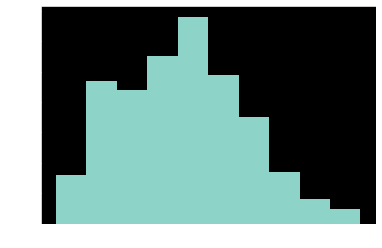

In [19]:
#hist
rj['hom_doloso'].plot(kind='hist')
plt.show()

If we summarize the totals per year, this number has been falling compared to the 1990s, where the numbers are exorbitant.

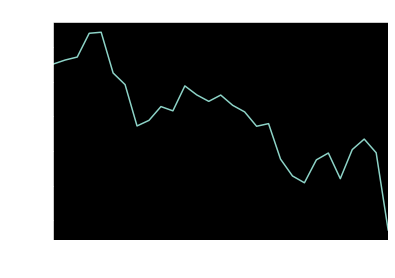

In [20]:
#total
rs_hol_dol = rj['hom_doloso'].resample('Y').sum()
rs_hol_dol.plot()
plt.xlabel('Year')
plt.ylabel('Total Murders')
plt.title('Total Murders per Year')

plt.show()

One problem that was plagued was the formation of gangs, which may explain the increase in collective robberies recorded per month. What is most surprising is the dramatic increase between 2016 and 2018.



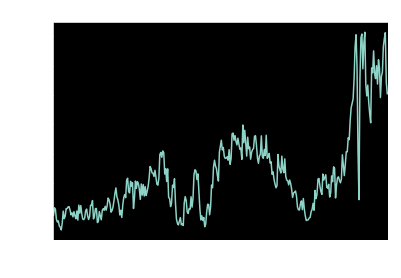

In [21]:
#roubo em coletivo
rj['roubo_em_coletivo'].plot()
plt.xlabel('Year')
plt.ylabel('Collective Thefts')
plt.title('Total Collective Thefts per Month')

plt.show()

Regarding the car theft problem mentioned earlier, we see some differences in the number of occurrences, when maintaining the annual averages.

Thefts have become common after the decade of 2010, where, after a certain "relief" compared to previous years, the number has risen dramatically.

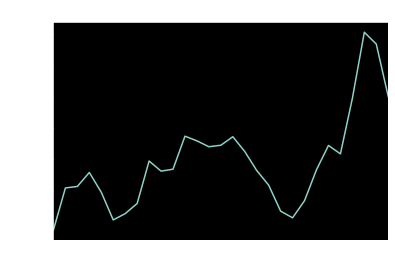

In [22]:
#plots
roubo_veic_ma.plot()
plt.xlabel('Year')
plt.ylabel('Avg')
plt.title('Average Vehicle Theft per Year')

plt.show()

Unlike filchs, where the protection technology and vehicle alarms technology has helped the occurrence drop, mainly also after the decade of 2010.

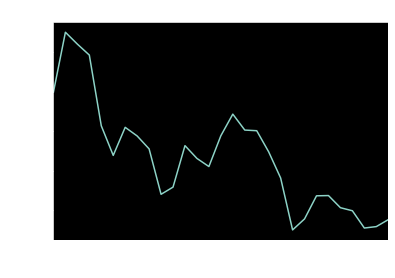

In [23]:
#plots
furto_veic_ma.plot()
plt.xlabel('Year')
plt.ylabel('Avg')
plt.title('Average Vehicle Filch per Year')

plt.show()

Here we can see the number of vehicle recovery almost proportional to the number of vehicles stolen and filched, justifying our calculation of 43%.

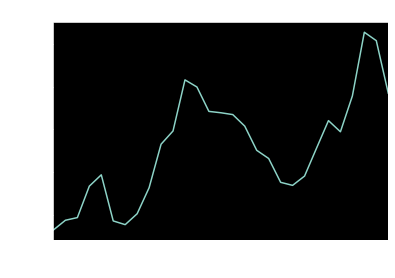

In [24]:
#plots
recup_veic_ma.plot()
plt.xlabel('Year')
plt.ylabel('Avg')
plt.title('Average Vehicle Recovery per Year')

plt.show()

## Conclusion

If we do a more in-depth analysis, we will see that some cases have increased, others have decreased their number of occurrences. This may be due to the economic crisis, population growth, advancement in technology, among other factors. Time series analysis combined with exploratory analysis helps us to improve the quality of our questions, and to reach a conclusion faster. Rio de Janeiro's criminal data is just one example of it.